# Use cases of Clustering

## Image Segmentation

- **Image segmentation** is the task of partitioning an image into multiple segments. 

- **Semantic segmentation**, all pixels that are part of the same object type get assigned to the same segment. For example, in a self-driving car’s vision system, all pixels that are part of a pedestrian’s image might be assigned to the “pedestrian” segment (there would just be one segment containing all the pedestrians). 

- **Instance segmentation**, all pixels that are part of the same individual object are assigned to the same segment. In this case there would be a different segment for each pedestrian.

> The state of the art in semantic or instance segmentation today is achieved using complex architectures based on convolutional neural networks

- **Color segmentation**, assign pixels to the same segment if they have a similar color.

The idea of **Color Segmentation** is to:

1. Load an image, normally of shape (height, width, rgb()) -> rgb between 0-1 or 0-255
2. Reshape the image (an array) into a long list of RGB colors
3. Then cluster these colors using k-Means

In [2]:
from matplotlib.image import imread
from sklearn.cluster import KMeans

In [ ]:
# load image
image = imread(path_to_image)

# to know how the shape
image.shape 

# reshape
X = image.reshape(-1, 3)

# kmeans object with k number of clusters
kmeans = KMeans(n_clusters=8).fit(X)

# Assing labels to each RGB color using only the cluster centers (k=8)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

# Reshape to original size to plot
segmented_img = segmented_img.reshape(image.shape)

<div>
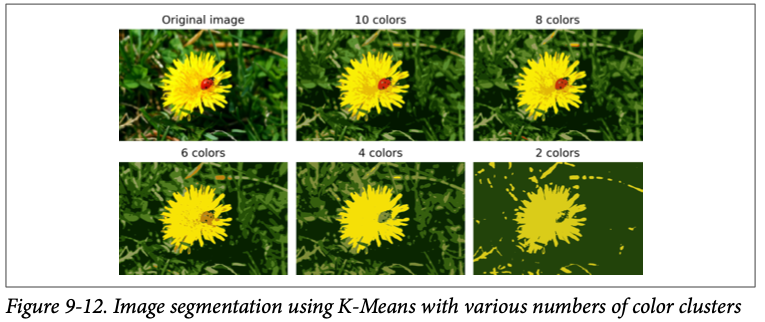
</div>

## Clustering for preprocessing

Clustering can be an efficient approach to dimensionality reduction, in particular as a preprocessing step before a supervised learning algorithm. 

## Clustering for semi-supervised learning

Useful when we have plenty of unlabeled instances and very few labeled ones.

We can do two things:

1. Cluster the training set and then manually lablel the representative image (the closest to the centroid) of each cluster. We can train on these new clusters.


2. Label propagation - Is doing #1 👆, and then instead of only training on a small subset, propagate the label to the rest of the images in the cluster.

> And we can even improve Label propagation by only propagating the labels to the closest images to the cluster centroid to avoid missclassification